In [56]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import r2_score

# DATA Preprocessing
null-value handling


In [57]:
df = pd.read_csv('/content/train.csv')

In [58]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [59]:
df.shape

(9800, 18)

In [60]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [61]:
df.dropna(subset=['Postal Code'], inplace=True) #postal code er mean median ber kora shomvob na tai dropna

In [62]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

we have product id and customer id,row id is not needed, country name is same for every row

In [63]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


# **Feature Selection(Encoding):**



In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float

In [65]:
    df = df.drop(['Row ID', 'Customer Name', 'Country', 'Product Name'], axis=1)

    # Drop customer-specific feature columns
    df = df.drop(['Order ID', 'Customer ID'], axis=1)

In [66]:
def encode_dates(dfa, column):
    dfa = dfa.copy()
    dfa[column] = pd.to_datetime(dfa[column])
    dfa[column + '_year'] = dfa[column].apply(lambda x: x.year)
    dfa[column + '_month'] = dfa[column].apply(lambda x: x.month)
    dfa[column + '_day'] = dfa[column].apply(lambda x: x.day)
    dfa = dfa.drop(column, axis=1)
    return dfa

def onehot_encode(dfa, column):
    dfa = dfa.copy()
    dummies = pd.get_dummies(dfa[column], prefix=column)
    dfa = pd.concat([dfa, dummies], axis=1)
    dfa = dfa.drop(column, axis=1)
    return dfa

In [67]:
def preprocess_inputs(dfa):
    dfa = dfa.copy()

    # Drop unnecessary columns


    # Extract date features
    dfa = encode_dates(dfa, column='Order Date')
    dfa = encode_dates(dfa, column='Ship Date')

    # One-hot encode categorical features
    for column in ['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category']:
        dfa = onehot_encode(dfa, column=column)
    return dfa


## **Outlier Handling**

In [68]:
summary_stats = df.describe()
print(summary_stats)

        Postal Code         Sales
count   9789.000000   9789.000000
mean   55273.322403    230.116193
std    32041.223413    625.302079
min     1040.000000      0.444000
25%    23223.000000     17.248000
50%    58103.000000     54.384000
75%    90008.000000    210.392000
max    99301.000000  22638.480000


In [69]:
dft = preprocess_inputs(df)
upper_limit= dft['Sales'].mean() + 3*dft['Sales'].std()
lower_limit= dft['Sales'].mean() - 3*dft['Sales'].std()

In [70]:
outlier = dft[(dft['Sales'] > upper_limit) | (dft['Sales'] < lower_limit)]
outlier

,Sales,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
27,3083.430,2016,9,17,2016,9,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,8159.952,2015,8,9,2015,12,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0
251,3347.370,2017,11,9,2017,9,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,3059.982,2015,9,19,2015,9,21,0,0,1,...,0,0,0,0,1,0,0,0,0,0
263,2519.958,2015,9,19,2015,9,21,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9425,3785.292,2015,12,9,2015,9,17,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9639,4297.644,2016,1,28,2016,1,31,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9649,3406.664,2017,11,26,2017,11,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9660,3023.928,2017,6,6,2017,11,6,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
new_dft = dft[(dft['Sales'] < upper_limit) & (dft['Sales'] > lower_limit)]
new_dft.shape

(9667, 3101)

In [72]:
dft

,Sales,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,261.9600,2017,8,11,2017,11,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,731.9400,2017,8,11,2017,11,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,14.6200,2017,12,6,2017,6,16,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,957.5775,2016,11,10,2016,10,18,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22.3680,2016,11,10,2016,10,18,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,3.7980,2017,5,21,2017,5,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9796,10.3680,2016,12,1,2016,1,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9797,235.1880,2016,12,1,2016,1,17,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9798,26.3760,2016,12,1,2016,1,17,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## **Scaling**

In [73]:
X= new_dft.drop('Sales', axis=1)
y= new_dft['Sales']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape, X_test.shape

((6766, 3100), (2901, 3100))

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
scaler.mean_

array([2.01671372e+03, 7.16671593e+00, 1.60526160e+01, ...,
       8.54271357e-02, 1.77357375e-02, 3.23677210e-02])

In [77]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#apply SelectKBest class to extract top 10 best features
test = SelectKBest(score_func= f_classif)
test.fit(X,y)
scores= pd.DataFrame(test.scores_)
columns = pd.DataFrame(X.columns)

featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,Order Date_year,0.989656
1,Order Date_month,0.993809
2,Order Date_day,1.014626
3,Ship Date_year,0.991617
4,Ship Date_month,1.033484
...,...,...
3095,Sub-Category_Paper,3.050628
3096,Sub-Category_Phones,4.776026
3097,Sub-Category_Storage,4.154567
3098,Sub-Category_Supplies,2.600383


In [78]:
print(featureScores.nlargest(900,'Score'))

                           Specs     Score
14                  City_Abilene       inf
43                 City_Bartlett       inf
72                  City_Burbank       inf
83             City_Cedar Rapids       inf
97           City_Citrus Heights       inf
...                          ...       ...
2710  Product ID_TEC-AC-10001284  3.573455
2809  Product ID_TEC-AC-10004708  3.573455
2988  Product ID_TEC-PH-10002468  3.573455
1955  Product ID_OFF-BI-10002414  3.573012
921          Postal Code_60174.0  3.572568

[900 rows x 2 columns]


# Decision tree

In [79]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

data = datasets.load_wine(as_frame = True)


X = data.data
y = data.target

import pandas as pd
df = pd.DataFrame(X)
features= df.columns
cn= pd.DataFrame([0,1,2])


scale = StandardScaler() #standardization
X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.74      0.82      0.78        17
           2       0.92      0.80      0.86        15

    accuracy                           0.82        45
   macro avg       0.84      0.82      0.83        45
weighted avg       0.83      0.82      0.82        45



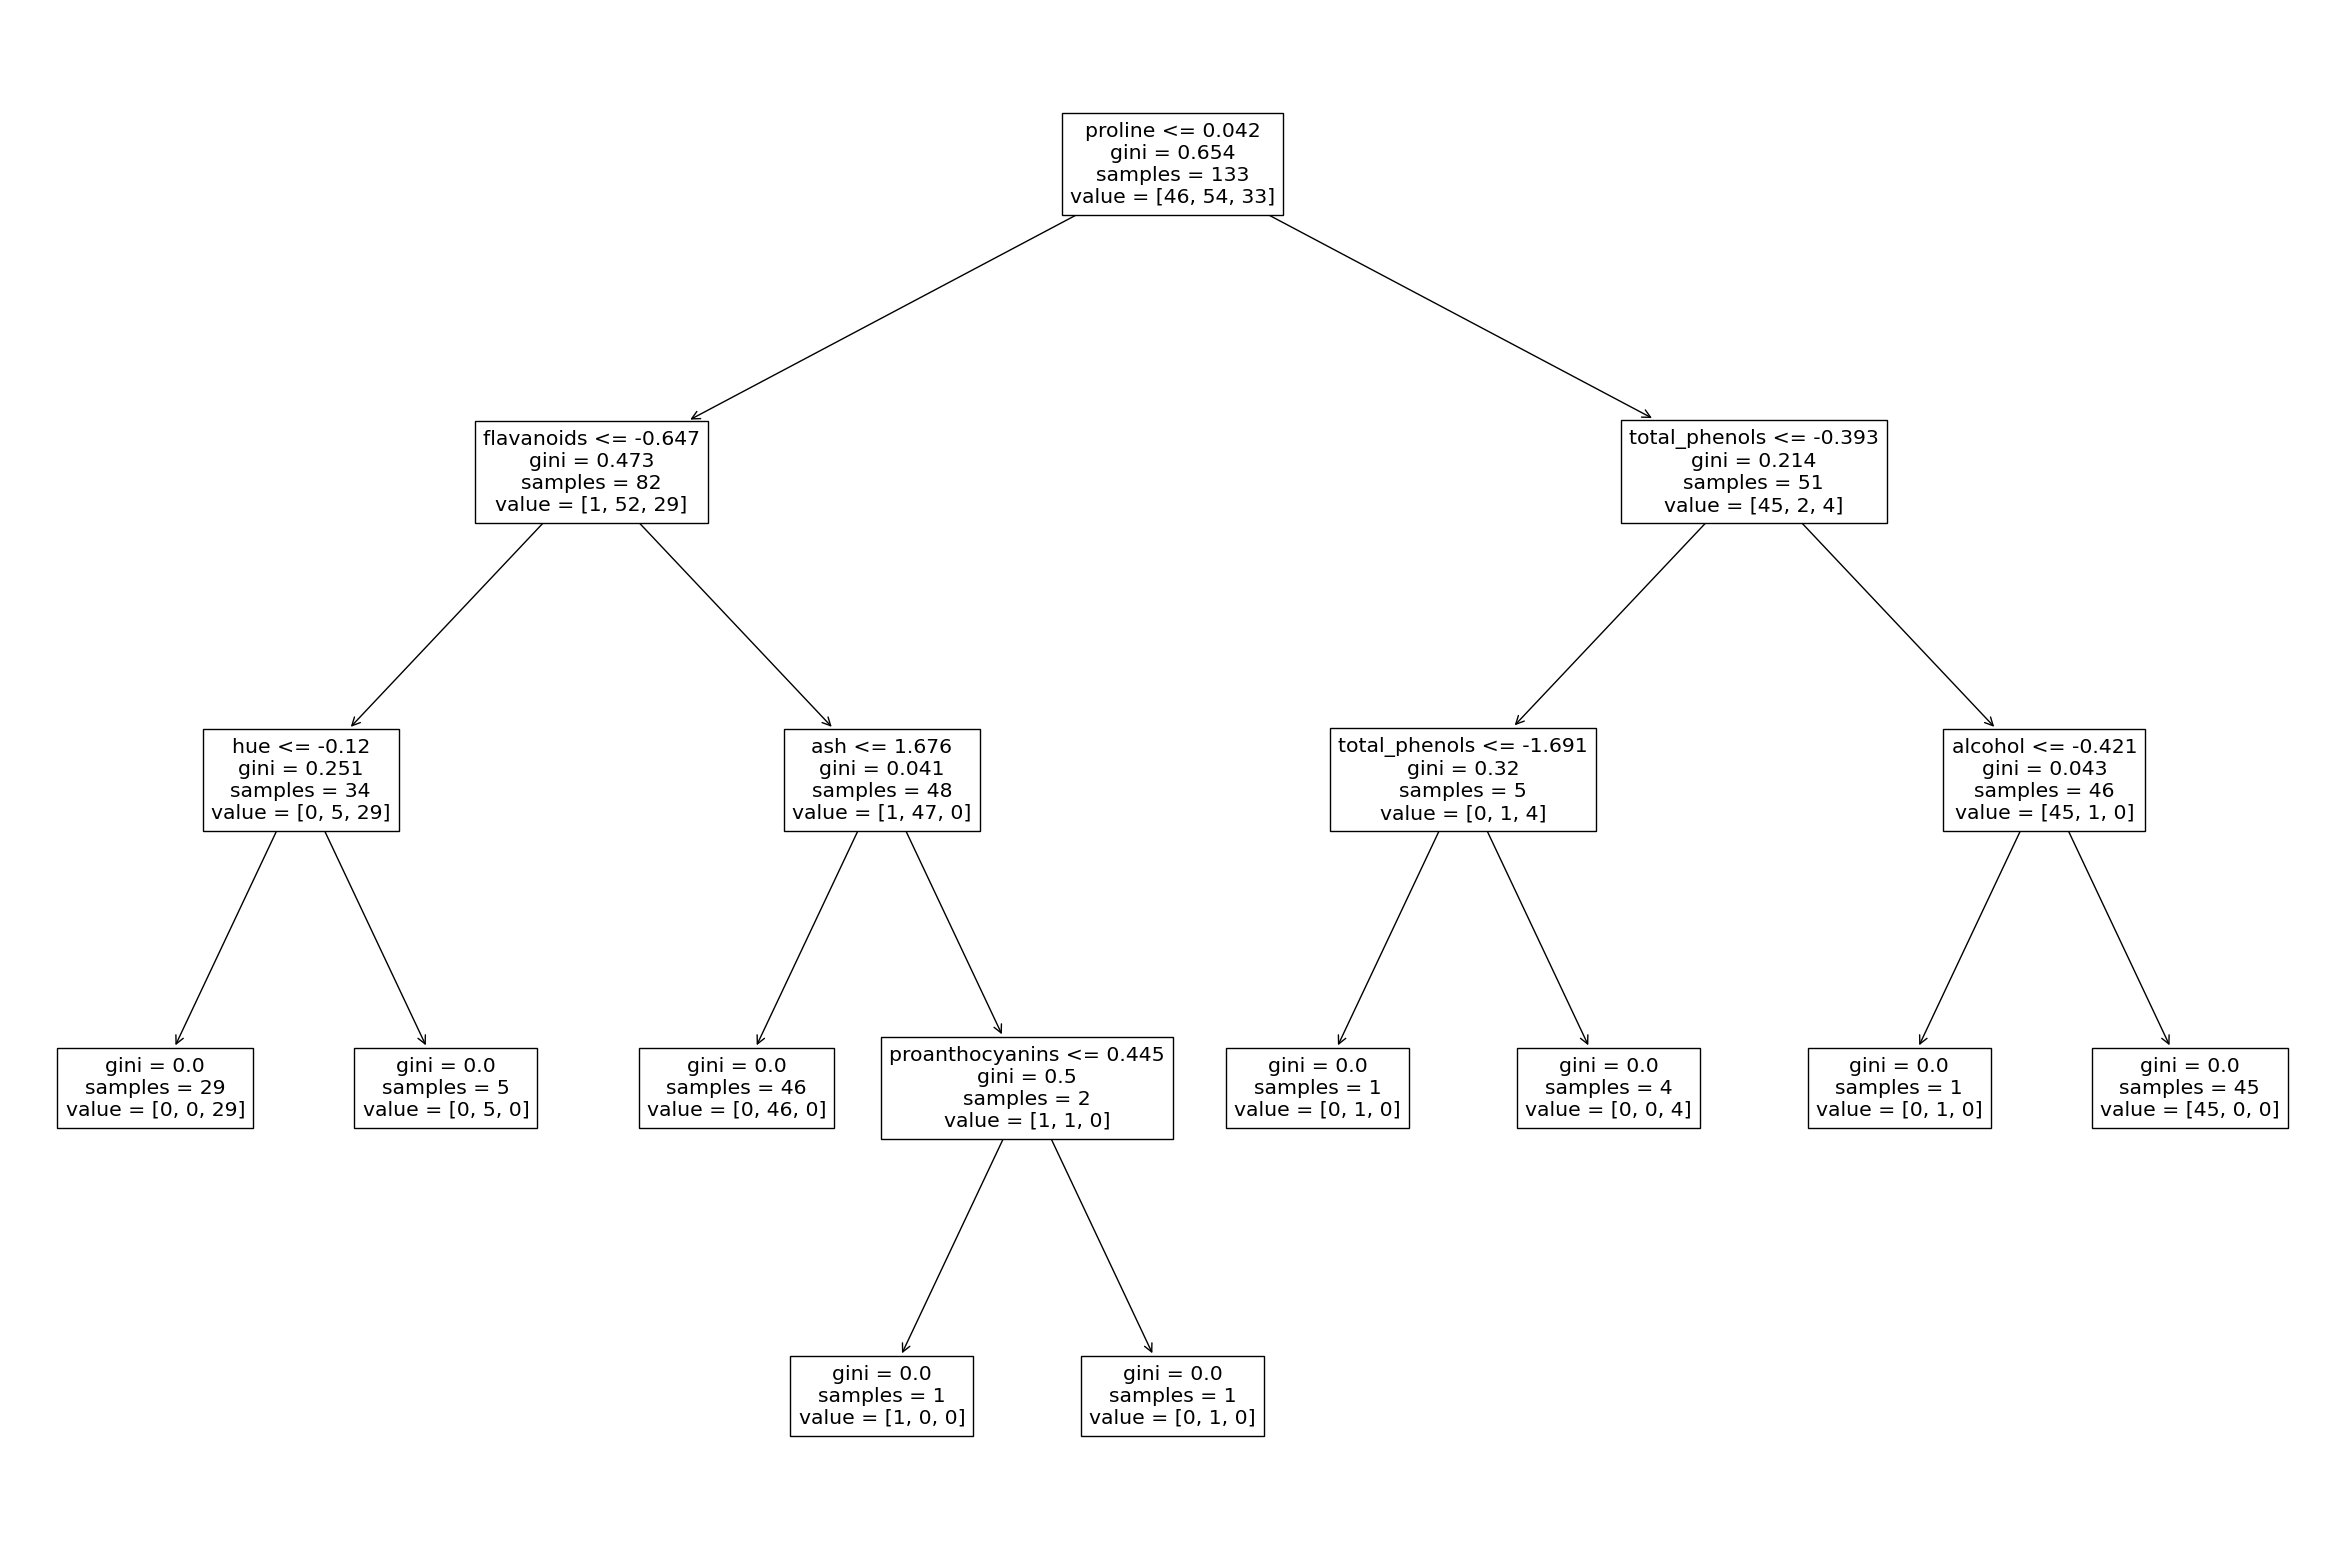

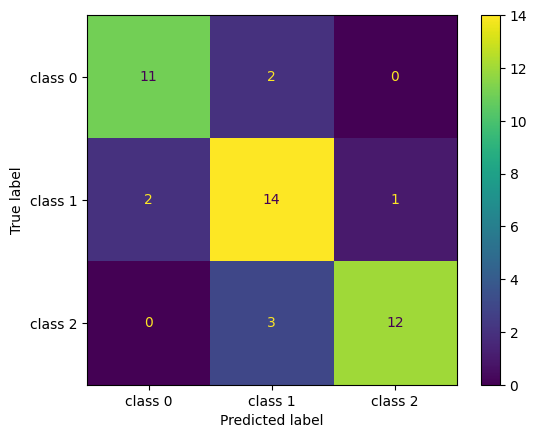

In [80]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() #training
dtree.fit(X_train,y_train)


plt.figure(figsize=(30, 20))
tree.plot_tree(dtree, feature_names = features) #plotting the decision tree

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = dtree.predict(X_test)))


c1=classification_report(y_test, dtree.predict(X_test))
print(c1)


confusion_matrix = metrics.confusion_matrix(y_test, dtree.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()


In [81]:
Accuracy1 = metrics.accuracy_score(y_test, dtree.predict(X_test))
Accuracy1

0.8222222222222222

In [82]:
import warnings
warnings.filterwarnings("ignore")

## KNeighbors Classifier

Train data accuracy: 0.9849624060150376
Test data accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.82      0.90        17
           2       0.88      1.00      0.94        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



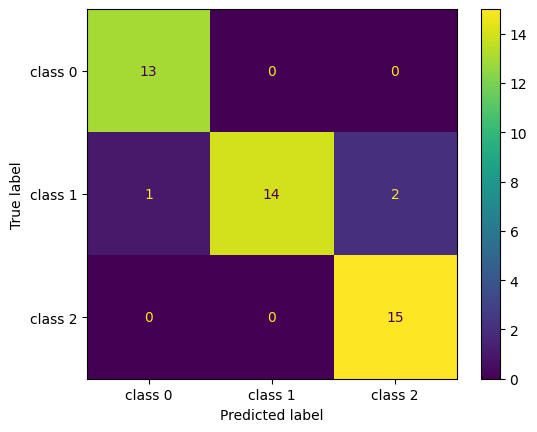

In [83]:
#KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = knn.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = knn.predict(X_test)))


c1=classification_report(y_test, knn.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, knn.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()


In [84]:
Accuracy2 = metrics.accuracy_score(y_test, knn.predict(X_test))
Accuracy2

0.9333333333333333

In [85]:
pip install mlxtend

## Logisitc Regression

Train data accuracy: 1.0
Test data accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



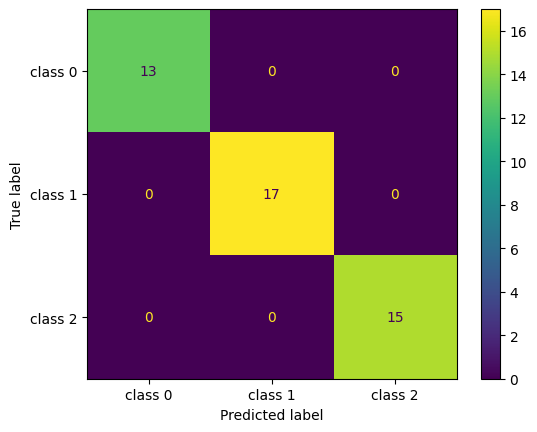

In [86]:
#Logistic Regression

from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = logr.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = logr.predict(X_test)))


c1=classification_report(y_test, logr.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, logr.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

In [87]:
Accuracy3 = metrics.accuracy_score(y_test, logr.predict(X_test))
Accuracy3

1.0

## Bagging Classifier

Train data accuracy: 1.0
Test data accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.89      0.94      0.91        17
           2       1.00      0.93      0.97        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



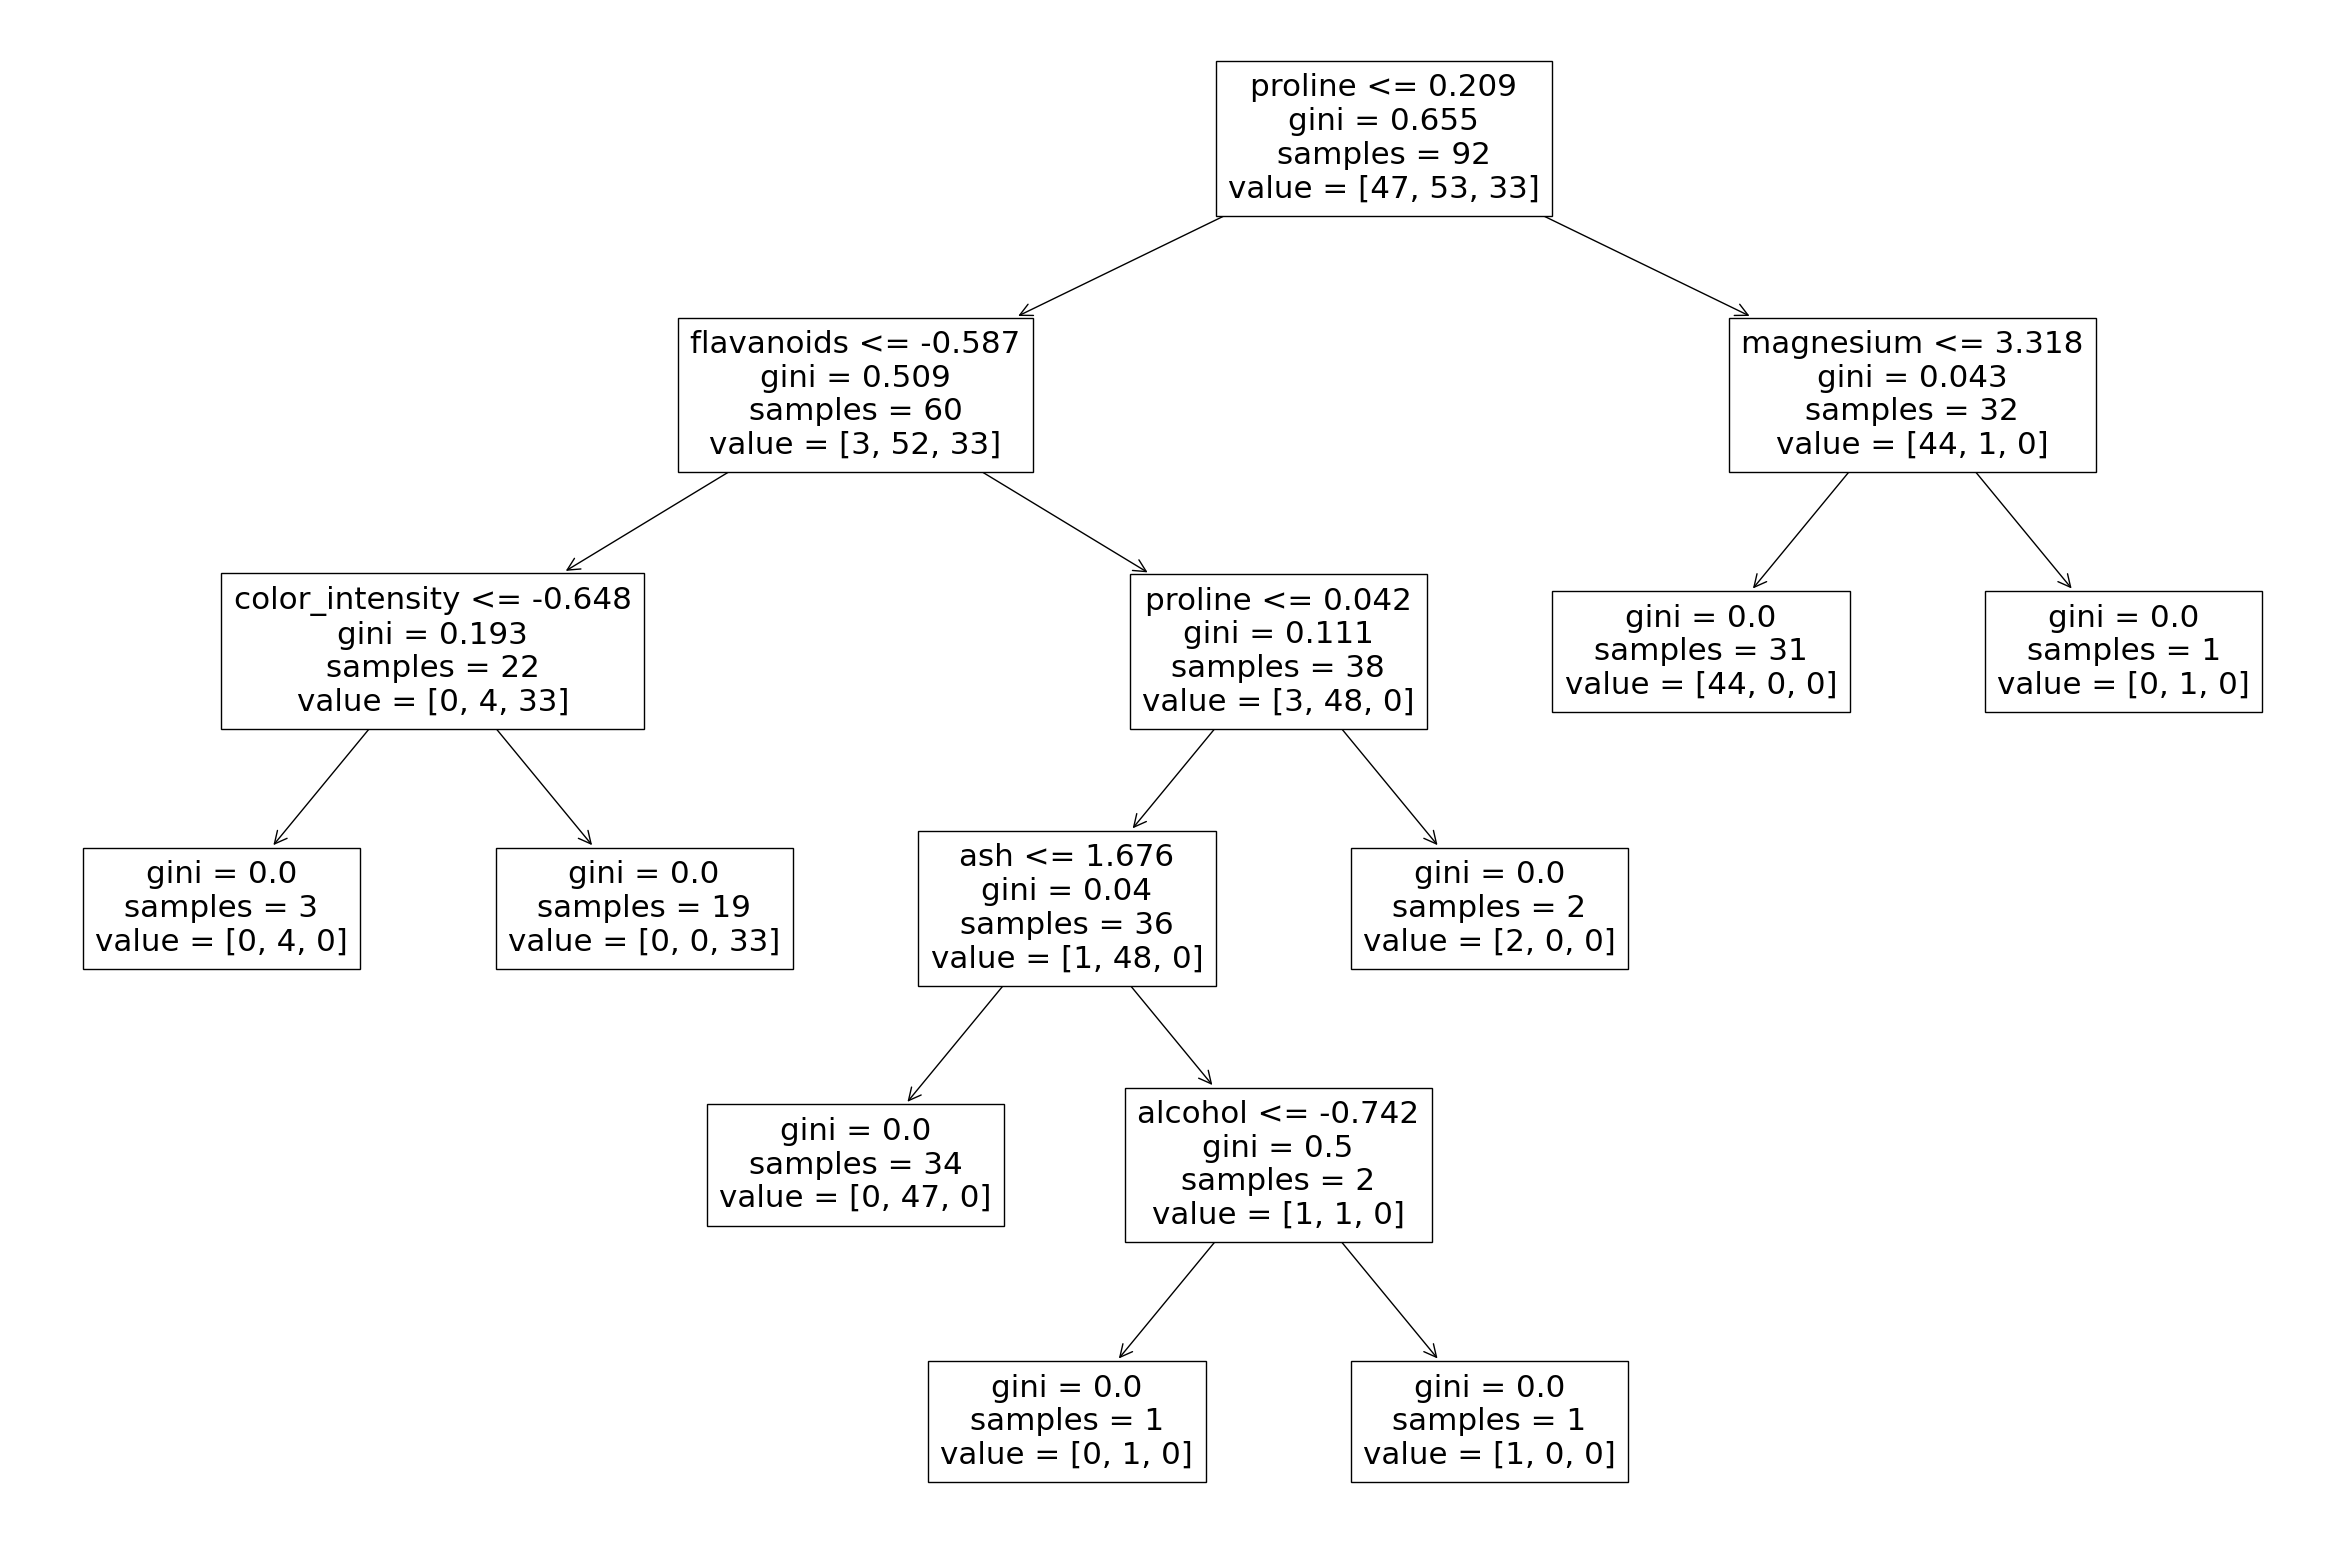

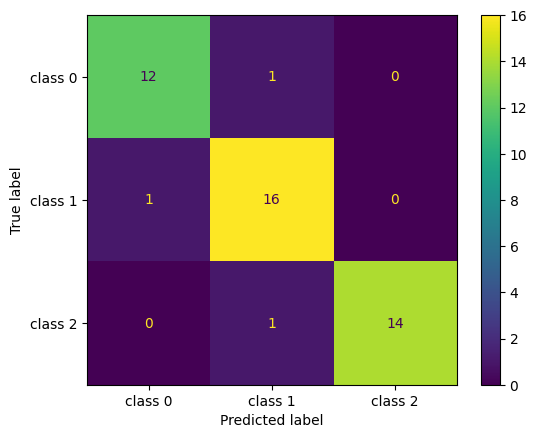

In [88]:
#Bagging Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

bagg = BaggingClassifier(n_estimators = 12)
bagg.fit(X_train, y_train)


plt.figure(figsize=(30, 20))
plot_tree(bagg.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bagg.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bagg.predict(X_test)))


c1=classification_report(y_test, bagg.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, bagg.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

In [89]:
Accuracy4 = metrics.accuracy_score(y_test, bagg.predict(X_test))
Accuracy4

0.9333333333333333

## AdaBoost Classifier

Train data accuracy: 1.0
Test data accuracy: 0.9111111111111111
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.84      0.94      0.89        17
           2       0.93      0.87      0.90        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.92        45
weighted avg       0.92      0.91      0.91        45



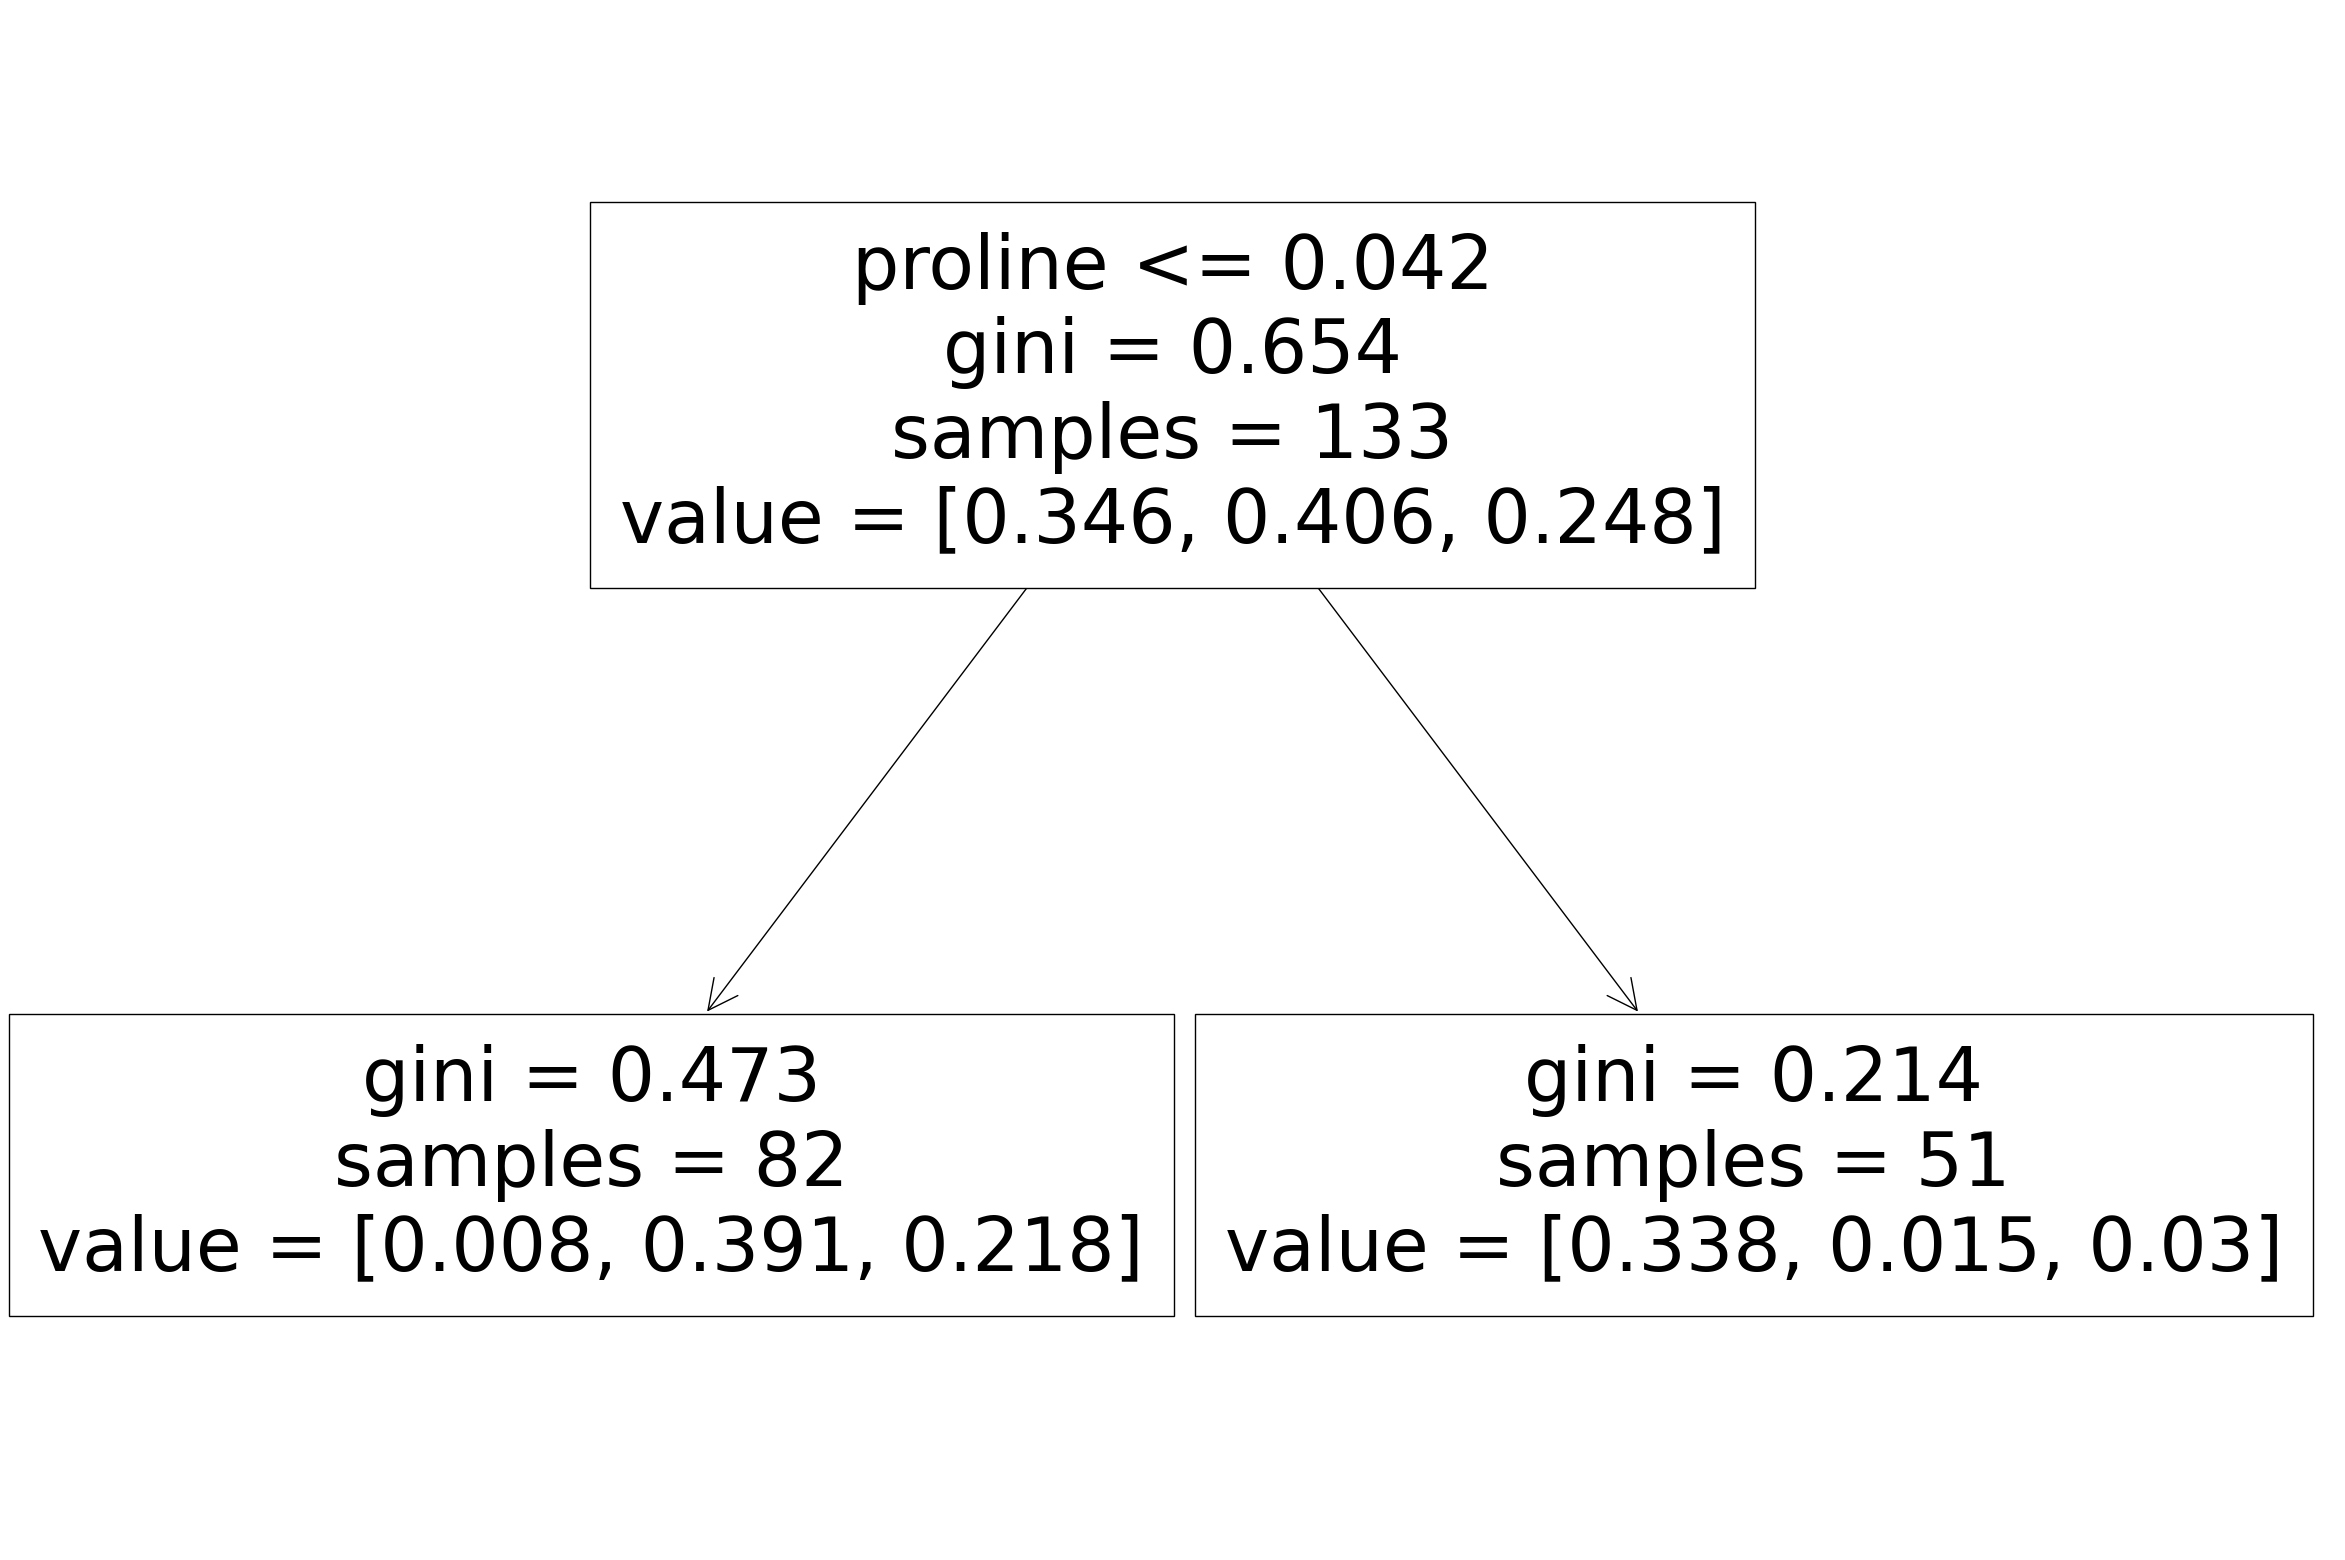

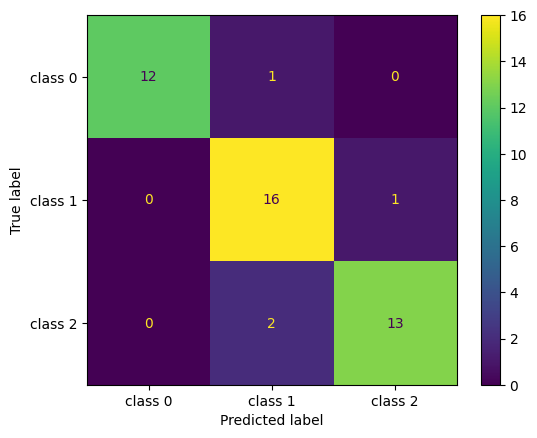

In [90]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(X_train, y_train)

plt.figure(figsize=(30, 20))
plot_tree(ada.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = ada.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = ada.predict(X_test)))


c1=classification_report(y_test, ada.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, ada.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

In [91]:
Accuracy5 = metrics.accuracy_score(y_test, ada.predict(X_test))
Accuracy5

0.9111111111111111

## Bernoulli Naive Bayes

Train data accuracy: 0.9548872180451128
Test data accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       0.93      0.76      0.84        17
           2       0.93      0.93      0.93        15

    accuracy                           0.89        45
   macro avg       0.89      0.90      0.89        45
weighted avg       0.90      0.89      0.89        45



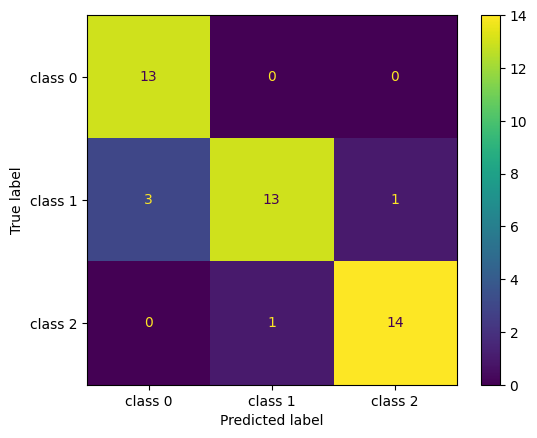

In [92]:
#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bnb.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bnb.predict(X_test)))


c1=classification_report(y_test, bnb.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, bnb.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

In [93]:
Accuracy6 = metrics.accuracy_score(y_test, bnb.predict(X_test))
Accuracy6

0.8888888888888888

## Random Forest

Train data accuracy: 0.9849624060150376
Test data accuracy: 0.9111111111111111
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.93      0.82      0.87        17
           2       0.93      0.93      0.93        15

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.91      0.91      0.91        45



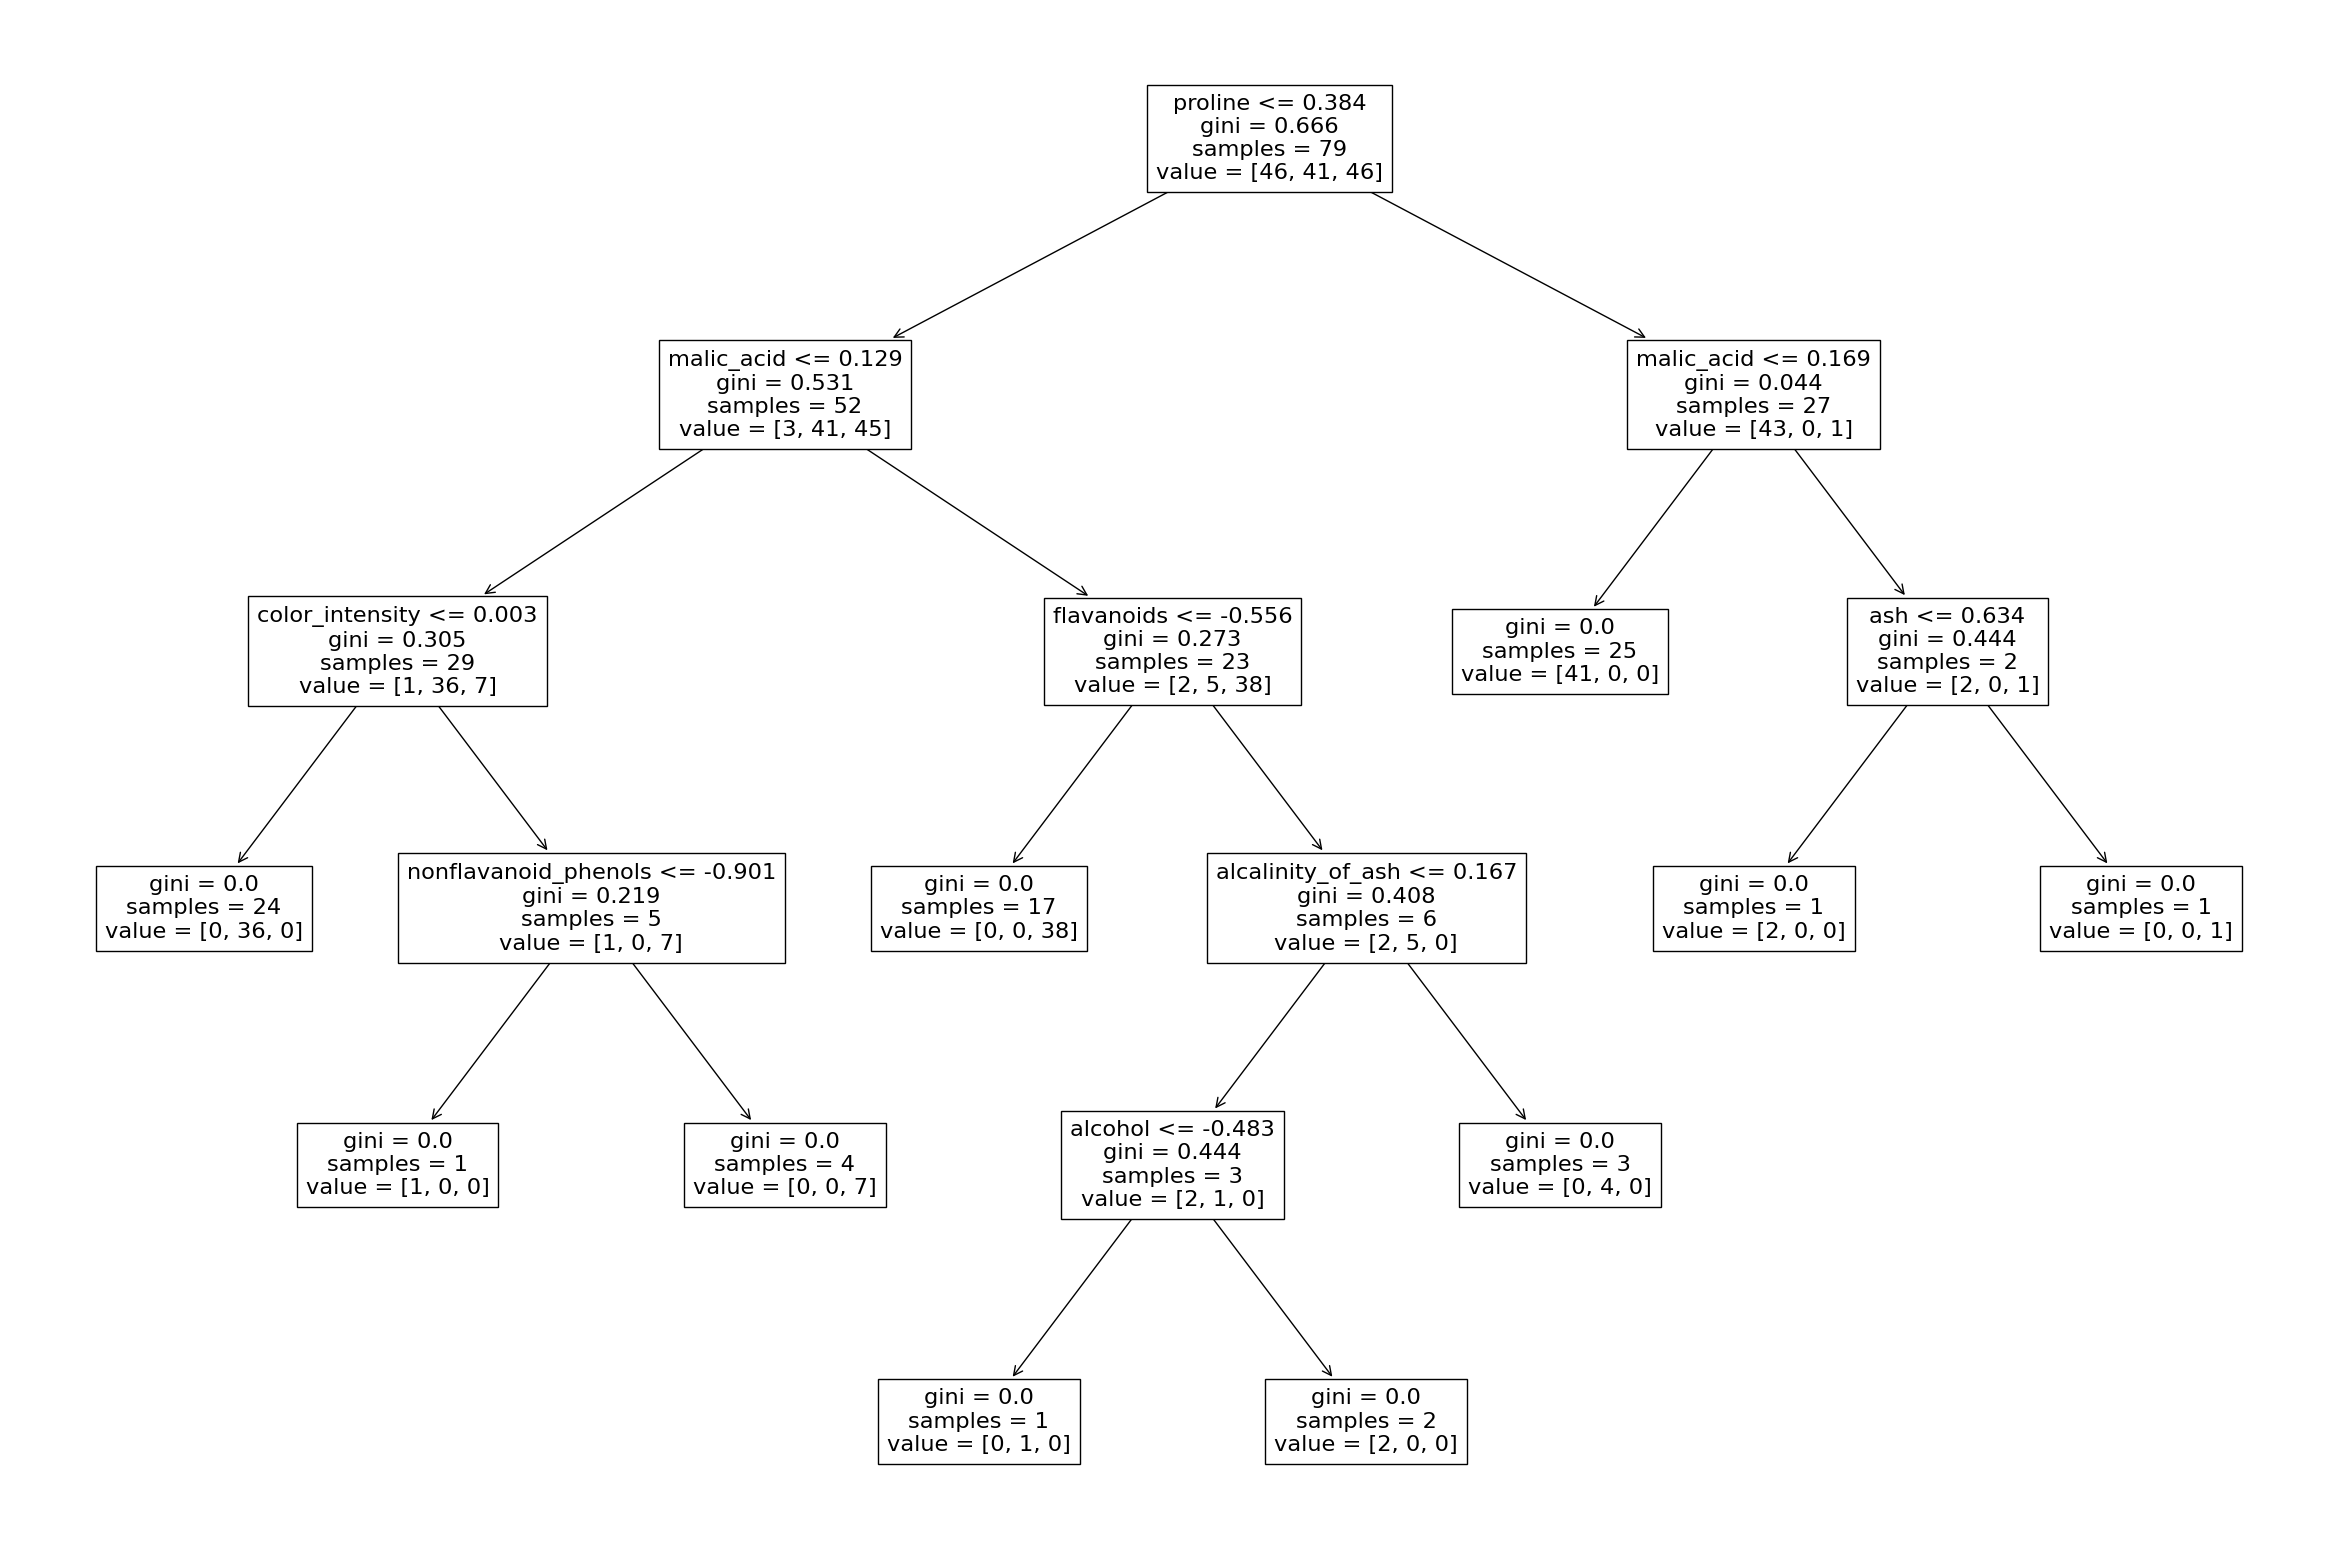

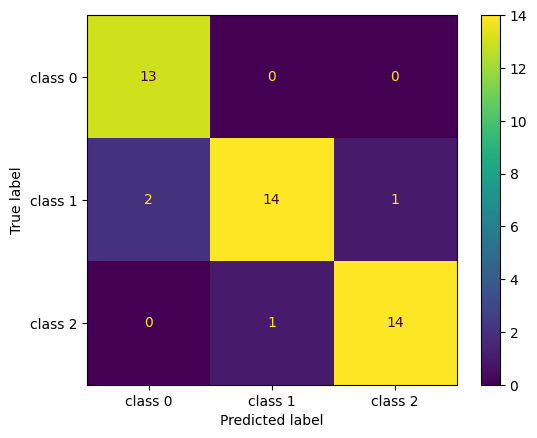

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train,y_train)

plt.figure(figsize=(30, 20))
plot_tree(rf.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = rf.predict(X_test)))


c1=classification_report(y_test, rf.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test,rf.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

In [95]:
Accuracy7 = metrics.accuracy_score(y_test,rf.predict(X_test))
Accuracy7

0.9111111111111111

## SVM

Train data accuracy: 1.0
Test data accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



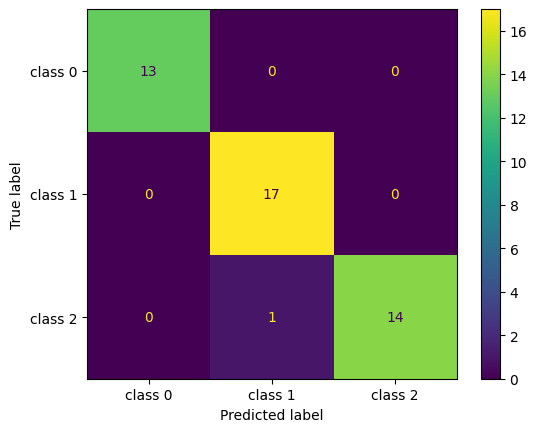

In [96]:
#SVM

from sklearn.svm import SVC
sv=SVC(gamma='auto')
sv.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = sv.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = sv.predict(X_test)))


c1=classification_report(y_test, sv.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, sv.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

In [97]:
Accuracy8 = metrics.accuracy_score(y_test, sv.predict(X_test))
Accuracy8

0.9777777777777777

## SGD

Train data accuracy: 1.0
Test data accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



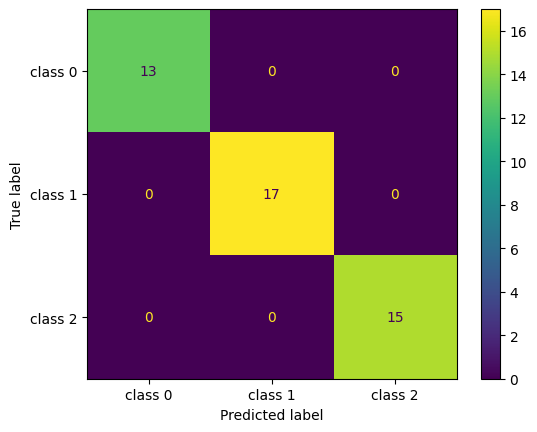

In [98]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000)
model.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = model.predict(X_test)))


c1=classification_report(y_test, model.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test,model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

In [99]:
Accuracy9 = metrics.accuracy_score(y_test,model.predict(X_test))
Accuracy9

1.0

## XgBoost

In [100]:
pip install xgboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Train data accuracy: 1.0
Test data accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.83      0.88      0.86        17
         

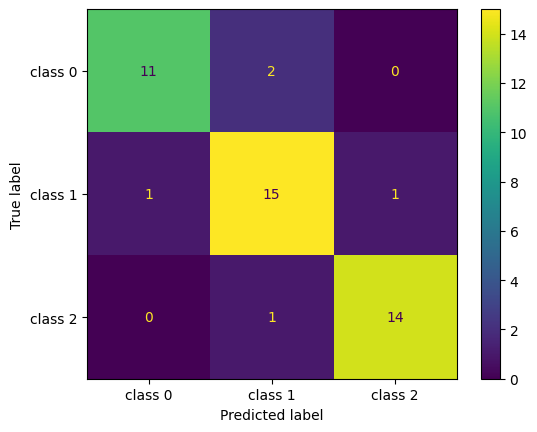

In [101]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=2)
model.fit(X_train, y_train)
print(model)


print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = model.predict(X_test)))


c1=classification_report(y_test, model.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test,model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

In [102]:
Accuracy10 = metrics.accuracy_score(y_test,model.predict(X_test))
Accuracy10

0.8888888888888888

## Grid Search for BaggingClassifier

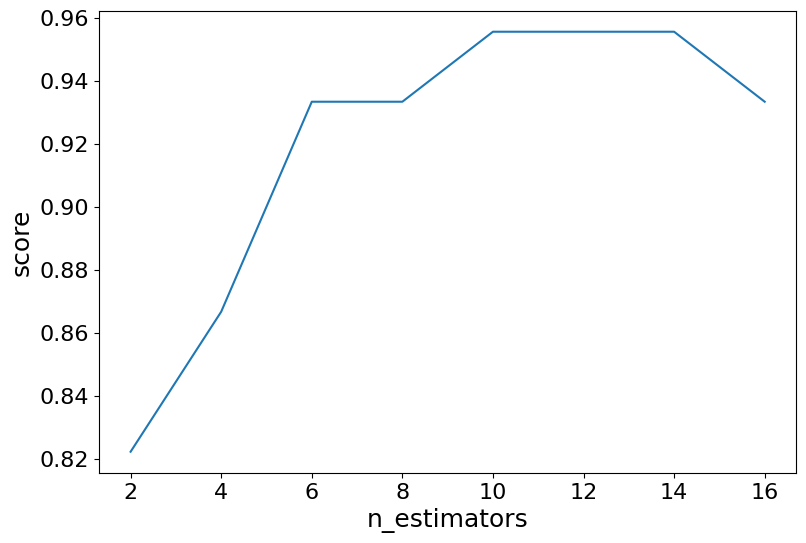

Train data accuracy: 0.9924812030075187
Test data accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.79      0.88      0.83        17
           2       1.00      0.87      0.93        15

    accuracy                           0.87        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.88      0.87      0.87        45



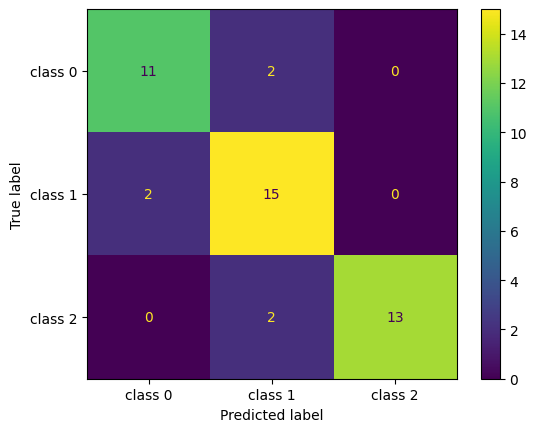

In [103]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()


#The curve shows that the highest accuracy achieves at n_estimators = 12


bagg = BaggingClassifier(n_estimators = 12)
bagg.fit(X_train, y_train)


print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bagg.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bagg.predict(X_test)))


c1=classification_report(y_test, bagg.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, bagg.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

In [104]:
Accuracy11 = metrics.accuracy_score(y_test, bagg.predict(X_test))
Accuracy11

0.8666666666666667

## Grid Search for Logistic Regression

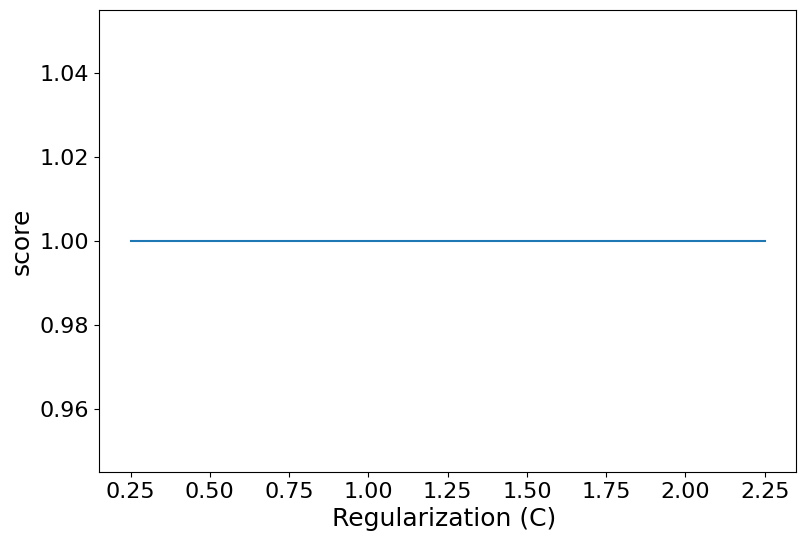

Train data accuracy: 1.0
Test data accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



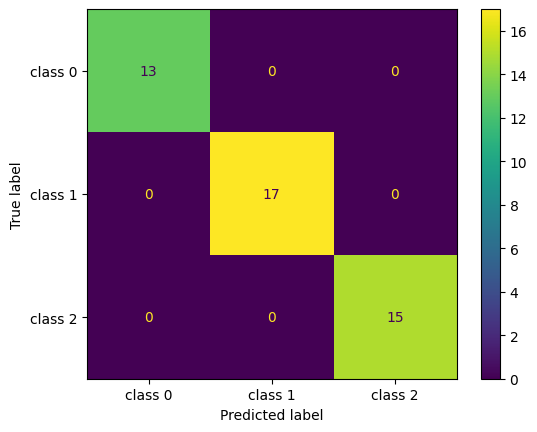

In [105]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression



logit = LogisticRegression(max_iter = 10000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25] #default value for C = 1

scores = []

for choice in C:
    logit.set_params(C=choice)
    logit.fit(X, y)
    scores.append(logit.score(X, y))

# Generate the plot of scores against C
plt.figure(figsize=(9,6))
plt.plot(C, scores)

# Adjust labels and font (to make visable)
plt.xlabel("Regularization (C) ", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()


#The curve shows that the highest accuracy achieves at C=2
logr = LogisticRegression(max_iter = 10000)
logr.set_params(C=2)
logr.fit(X_train,y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = logr.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = logr.predict(X_test)))


c1=classification_report(y_test, logr.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, logr.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

In [106]:
Accuracy12 = metrics.accuracy_score(y_test, logr.predict(X_test))
Accuracy12

1.0

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


Accuracy1 = metrics.accuracy_score(y_test, dtree.predict(X_test))
Accuracy2 = metrics.accuracy_score(y_test, knn.predict(X_test))
Accuracy3 = metrics.accuracy_score(y_test, logr.predict(X_test))
Accuracy4 = metrics.accuracy_score(y_test, bagg.predict(X_test))
Accuracy5 = metrics.accuracy_score(y_test, ada.predict(X_test))
Accuracy6 = metrics.accuracy_score(y_test, bnb.predict(X_test))
Accuracy7 = metrics.accuracy_score(y_test,rf.predict(X_test))
Accuracy8 = metrics.accuracy_score(y_test, sv.predict(X_test))
Accuracy9 = metrics.accuracy_score(y_test,model.predict(X_test))
Accuracy10 = metrics.accuracy_score(y_test,model.predict(X_test))
Accuracy11 = metrics.accuracy_score(y_test, bagg.predict(X_test))
Accuracy12 = metrics.accuracy_score(y_test, logr.predict(X_test))

# Create a comparison matrix
comparison_matrix = {
    'Model': ['Decision Tree', 'KNeighbors', 'Logistic Regression','Bagging Classifier','AdaBoost','Naive bayes','Random Forest','SVM','Stochastic gradient descent','XgBoost','Grid Search for BaggingClassifier','Grid Search for Logistic Regression'],
    'Accuracy': [Accuracy1, Accuracy2, Accuracy3, Accuracy4, Accuracy5, Accuracy6, Accuracy7, Accuracy8, Accuracy9, Accuracy10, Accuracy11, Accuracy12],
}

# Display the comparison matrix
import pandas as pd
df_comparison = pd.DataFrame(comparison_matrix)
df_comparison_sorted = df_comparison.sort_values(by='Accuracy', ascending=False)
print(df_comparison_sorted)

                                  Model  Accuracy
2                   Logistic Regression  1.000000
11  Grid Search for Logistic Regression  1.000000
7                                   SVM  0.977778
1                            KNeighbors  0.933333
4                              AdaBoost  0.911111
6                         Random Forest  0.911111
5                           Naive bayes  0.888889
8           Stochastic gradient descent  0.888889
9                               XgBoost  0.888889
3                    Bagging Classifier  0.866667
10    Grid Search for BaggingClassifier  0.866667
0                         Decision Tree  0.822222
